In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# **Removing unwanted columns**

In [36]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [37]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
df=df.rename({'v1':'target','v2':'text'},axis=1)

In [39]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Checking null values

In [40]:
print(df.isnull().sum())


target    0
text      0
dtype: int64


# **lets make another column i.e the length of the text**

In [41]:
len_text=[]
for i in df['text']:
  len_text.append(len(i))


In [42]:
df['text_length']=len_text

In [43]:
df

,target,text,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


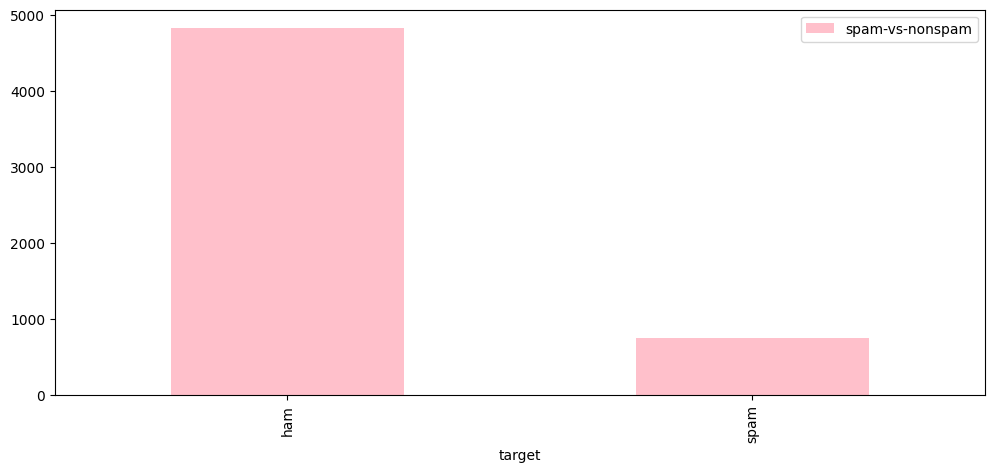

In [44]:
plt.figure(figsize=(12,5))
df['target'].value_counts().plot(kind='bar',color='pink',label='spam-vs-nonspam')
plt.legend()
plt.show()

#from this figure we can conclude that ham messages are more than spam messages

In [45]:
df['target']=np.where(df['target']=='spam',1,0)

In [47]:
y=df['target']
x=df['text']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Selecting best model

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
cv=CountVectorizer()
lr=LogisticRegression(max_iter=10000)
x_train=cv.fit_transform(x_train)

In [50]:
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))
score_1=accuracy_score(y_test,pred_1)
score_1

0.9766816143497757

In [51]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_2=nb.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
score_2


0.9874439461883409

In [52]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
score_3

0.9766816143497757

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_2)
print(cm)

[[947   2]
 [ 12 154]]


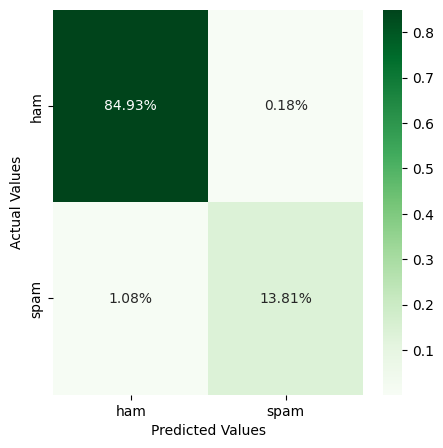

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,pred_2)
plt.figure(figsize=(5,5))
ax = sns.heatmap(cm/np.sum(cm),fmt=".2%",annot=True,cmap="Greens")
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()


In [55]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred_2)
print(report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       949
           1       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Best model: Multinomial Naive Bayes with accuracy score of 0.9874439461883409


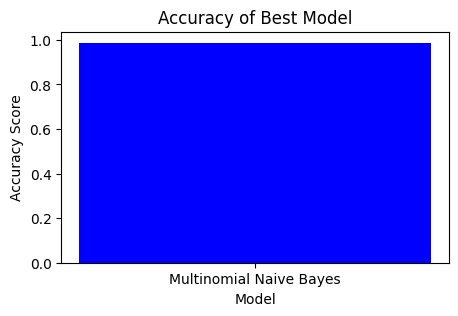

In [56]:
# Select the best model based on the highest accuracy score
best_model = None
best_score = 0

for model, score in [('Logistic Regression', score_1), ('Multinomial Naive Bayes', score_2), ('Support Vector Machine', score_3)]:
    if score > best_score:
        best_model = model
        best_score = score

# Print the best model
print(f"Best model: {best_model} with accuracy score of {best_score}")

# Create a bar chart to visualize the accuracy of the best model
plt.figure(figsize=(5, 3))
plt.bar(best_model, best_score, color='blue', width=0.5)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Best Model')
plt.show()
